### Class exercise: table
![](../../images/numpy_slice_ex.png)
- on the above image find the 5 different slicings using only the array slicing notation

In [3]:
# the following line is jupyter notebook specific 
%matplotlib inline
import numpy as np

a = np.arange(10, 30).reshape(4, 5)

# y, x
yellow = a[0,0];
lightBlue = a[:,1::2]
blue = a[::2, 4]
red = a[0, 1:4]
green = a[0:3, 2]


print(yellow)
print(lightBlue)
print(blue)
print(red)
print(green)

10
[[11 13]
 [16 18]
 [21 23]
 [26 28]]
[14 24]
[11 12 13]
[12 17 22]


In [4]:
cube = np.arange(0, 27).reshape((3, 3, 3)) # = (z, y, x)

print(cube[1, 1, :])
print(cube[:, 1, 0])
print(cube[0, :, 2])

[12 13 14]
[ 3 12 21]
[2 5 8]


# Week 4 Exercise with Numpy

1. Open the file './data/befkbhalderstatkode.csv'
2. Turn the csv file into a numpy ndarray with `np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)`

In [5]:
data = np.genfromtxt('../../data/befkbhalderstatkode.csv', delimiter=',', dtype=np.uint, skip_header=1)

neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
       5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
       10: 'Amager Vest', 99: 'Udenfor'}

In [8]:
# Find out how many people lived in each of the 11 areas in 2015

headers = {'AAR': 0, 'BYDEL': 1, 'ALDER': 2, 'STATKODE': 3, 'PERSONER': 4}

num_of_cit_for_area = {v: np.sum(data[data[:,1] == k][:,4]) for k,v in neighb.items()}
print(num_of_cit_for_area)

NameError: name 'k' is not defined

<IPython.core.display.Javascript object>


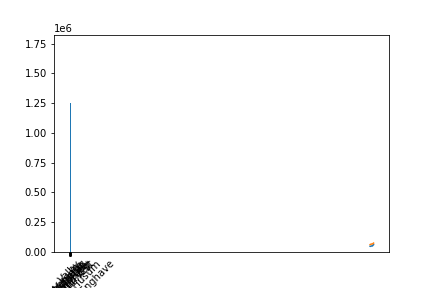

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 <a list of 11 Text major ticklabel objects>)

In [10]:
# 4. Make a bar plot to show the size of each city area from the smallest to the largest
%matplotlib notebook
import matplotlib.pyplot as plt

sorted_num_of_cit_for_area = {k: v for k,v in sorted(num_of_cit_for_area.items(), key=lambda x: x[1])}

plt.bar(sorted_num_of_cit_for_area.keys(), sorted_num_of_cit_for_area.values())
plt.xticks(rotation=45)




In [24]:
# Create a boolean mask to find out how many people above 65 years lived in Copenhagen in 2015
above_65_2015_mask = (data[:, 0] == 2015) & (data[:,2] > 65)
print(np.sum(data[above_65_2015_mask][:,4]))

# How many of those were from the other nordic countries (not dk)

above_65_2015_foreign = (data[:, 0] == 2015) & (data[:,2] > 65) & (data[:,3] != 5100)
print(np.sum(data[above_65_2015_foreign][:,4]))


55750
3451


<IPython.core.display.Javascript object>


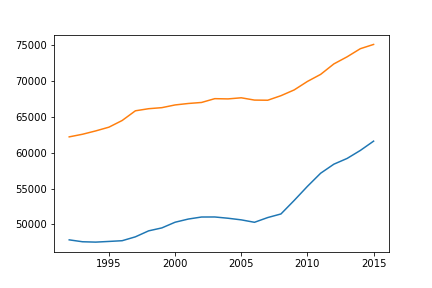

In [12]:
# Make a line plot showing the changes of number of people in vesterbro and østerbro from 1992 to 2015

years = np.unique(data[:,0])

vesterbro = {year: np.sum(data[(data[:,0] == year) & (data[:,1] == 4)][:,4]) for year in years}
osterbro = {year: np.sum(data[(data[:,0] == year) & (data[:,1] == 2)][:,4]) for year in years}

vx, vy = zip(*vesterbro.items())
ox, oy = zip(*osterbro.items())

plt.plot(vx,vy)
plt.plot(ox, oy)

